## Creating elevation map for NZ
data from https://data.linz.govt.nz/layer/51768-nz-8m-digital-elevation-model-2012/data/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn as sns
import pickle
import os
from PIL import Image
from zipfile import ZipFile
from sys import getsizeof
from glob import glob

## Extract data

In [9]:
zips = glob('nz/raw/*zip')

In [11]:
zips[:5]

['nz/raw/lds-tile-il-GTiff.zip',
 'nz/raw/lds-tile-rg-GTiff.zip',
 'nz/raw/lds-tile-ck-GTiff.zip',
 'nz/raw/lds-tile-sc-GTiff.zip',
 'nz/raw/lds-tile-km-GTiff.zip']

In [ ]:
for file in zips:
    with ZipFile(file, 'r') as zipObj:
        zipObj.extractall('nz/extracted')

In [12]:
tiffs = glob('nz/extracted/*')

In [ ]:
for t in tiffs:
    if 'tif' in t:
        code = t[13:15]
        os.rename(t, f'nz/tiffs/{code}.tif')

## Plot sample

In [13]:
code_list = os.listdir('nz/tiffs')

In [26]:
code_list[:5]

['RC.tif', 'SG.tif', 'HM.tif', 'EJ.tif', 'FP.tif']

In [15]:
this_tif = code_list[6]

path = f'nz/tiffs/{this_tif}'
im = Image.open(path)
x = np.array(im)

In [20]:
x.shape

(8192, 8192)

In [21]:
x.max()

1167.2609

In [22]:
x[x==-32767] = float('nan')

In [23]:
scale = 50
scaled = x[::scale,::scale]

In [24]:
scaled.shape

(164, 164)

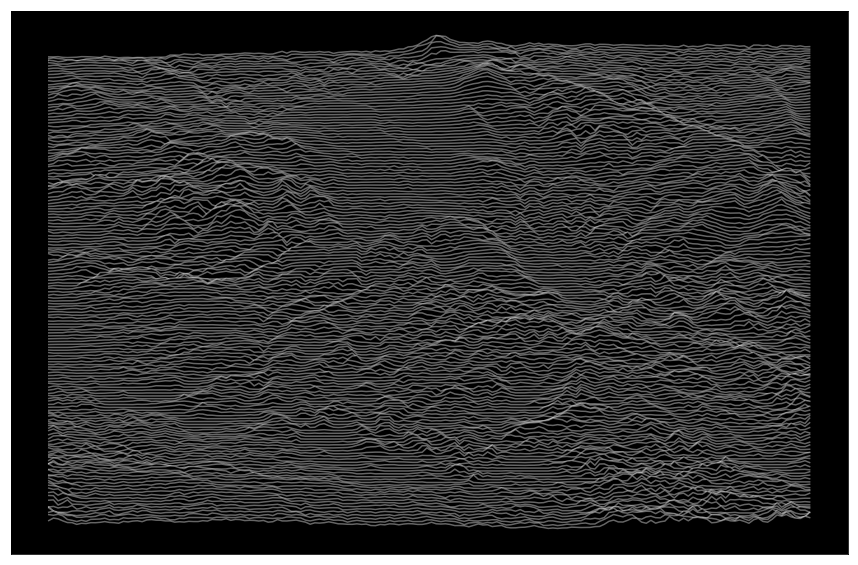

In [25]:
for idx in range(0,scaled.shape[1],1):
    factor = 100
    
    y_plt = scaled[:,idx] + idx * factor
    x_plt = range(y_plt.shape[0])
    #plt.plot(x_plt,y_plt,c='green',alpha=.3)
    plt.plot(x_plt,y_plt,c='white',alpha=.4,zorder=-idx)
    plt.fill_between(x_plt,y_plt,y2=0, interpolate=True, color='black',zorder=-idx)


fig,ax = plt.gcf(),plt.gca()
ax.set_facecolor(color='black')
zoom = 2.5
fig.set_size_inches(6*zoom,4*zoom)
#_ = plt.axis('off')

_ = ax.get_yaxis().set_ticks([])
_ = ax.get_xaxis().set_ticks([])

## Load multiple

In [ ]:
x.shape

In [3]:
path = 'nz/tiffs/'
tiffs = os.listdir(path)
tif_list = [os.path.join(path,t) for t in tiffs if 'tif' in t]
names = [t.split('/')[2].split('.')[0] for t in tif_list]

In [5]:
data_dict = {}
scale = 16

for name in names:
    path = f'nz/tiffs/{name}.tif'
    im = Image.open(path)
    data = np.array(im)
    data_dict[name] = data[::scale,::scale]

In [6]:
len(names)

115

In [7]:
def get_loc(name):
    char_1,char_2 = name[0],name[1]
    x = ord(char_2) - 65
    y_1 = ord(char_1) - 65
    y = 22 - y_1
    return x,y

In [8]:
get_loc('AA')

(0, 22)

In [9]:
8192/16

512.0

In [10]:
scale = 16
segment = int(8192 / scale)
state = np.zeros((16*segment,23*segment))
state.fill(np.nan)

In [11]:
for key in data_dict:
    data = data_dict[key]
    x,y = get_loc(key)
    to_insert = data#[::scale,::scale]
    state[x*segment:(x+1)*segment,y*segment:(y+1)*segment] = np.rot90(to_insert,k=3)

In [12]:
state[state==-32767] = float('nan')

In [15]:
## save state
save_path = 'nz/state.pickle'
with open(save_path,'wb') as f:
    pickle.dump(state,f)

In [26]:
scale = 30

scaled = state[::scale,::scale]

In [83]:
scale_1,scale_2 = 10,30

scaled = state[::scale_1,::scale_2]

In [84]:
# 10,30 --> (820, 393)
# 30,30 --> (274, 393)
# 30,10 --> (274, 1178)

In [85]:
scaled.shape

(820, 393)

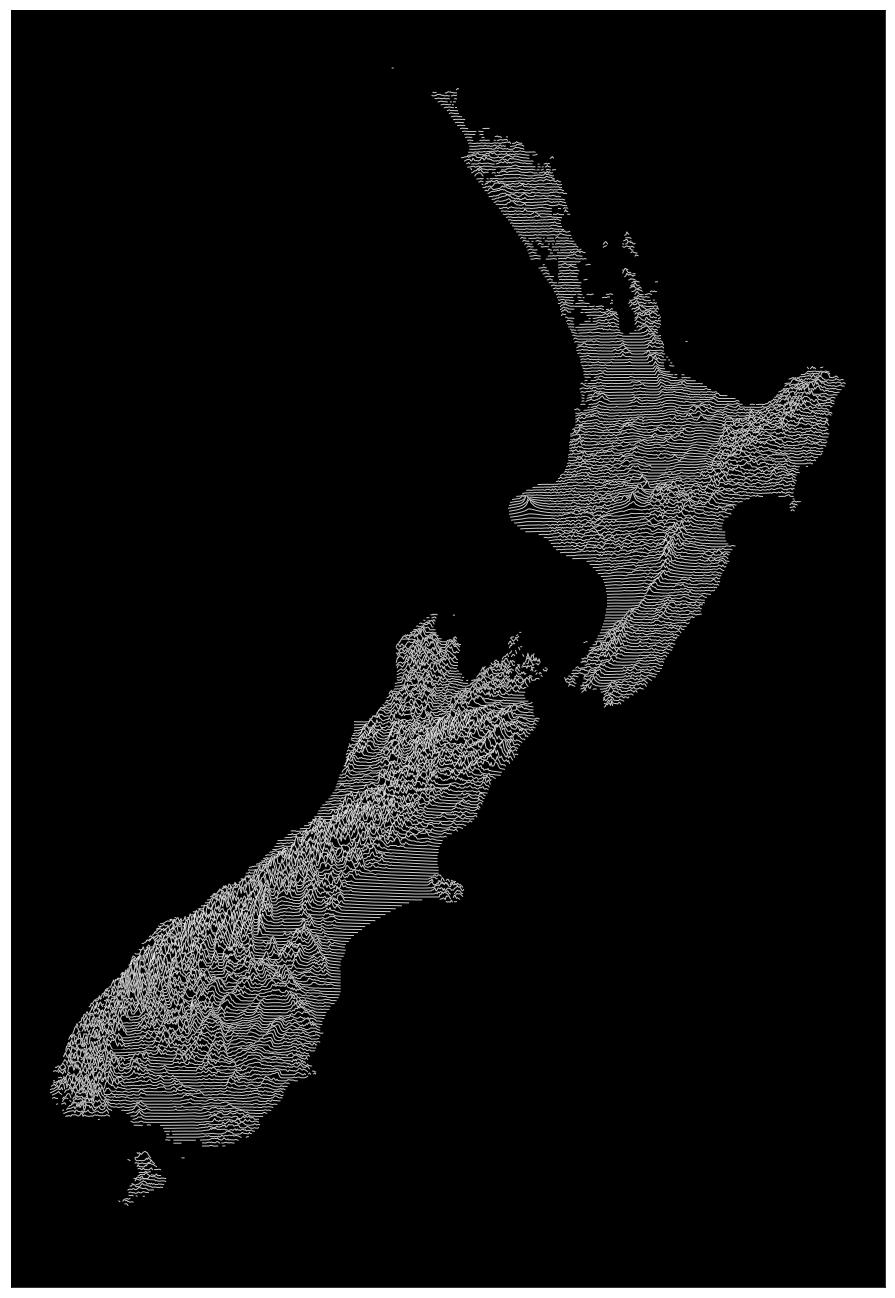

In [92]:
## new
for idx in range(0,scaled.shape[1],1):
    factor = 400
    
    y_plt = scaled[:,idx] + idx * factor
    #x_plt = range(y_plt.shape[0])
    x_num = y_plt.shape[0]
    x_plt = np.arange(0,x_num)
    #plt.plot(x_plt,y_plt,c='green',alpha=.3)
    plt.plot(x_plt,y_plt,c='white',alpha=.8,zorder=-idx,linewidth=1)
    plt.fill_between(x_plt,y_plt,y2=0, interpolate=True, color='black',zorder=-idx)

fig,ax = plt.gcf(),plt.gca()
ax.set_facecolor(color='black')
zoom = 15
ratio = 1.5
height = 23.5
#fig.set_size_inches(zoom,ratio*zoom)
fig.set_size_inches(height/ratio,height)

#_ = plt.axis('off')

_ = ax.get_yaxis().set_ticks([])
_ = ax.get_xaxis().set_ticks([])

plt.savefig('nz/scale_10_30_factor_400_ratio_1.5.png',dpi=500)